In [14]:
%matplotlib inline
from __future__ import division
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
x = np.linspace(0.0, 1.0,1000)

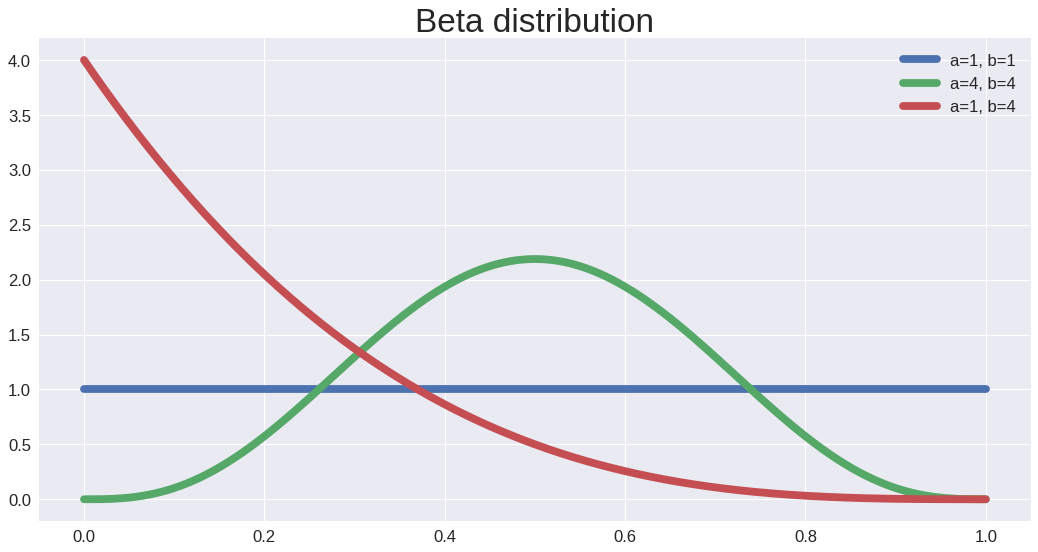

In [19]:
plt.figure(num=None, figsize=(16,8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, beta.pdf(x, 1, 1), label='a=1, b=1', lw=7)
plt.plot(x, beta.pdf(x, 4, 4), label='a=4, b=4', lw=7)
plt.plot(x, beta.pdf(x, 1, 4), label='a=1, b=4', lw=7)
plt.legend(fontsize=15)
plt.title('Beta distribution', fontsize=30)

In [27]:
import scipy.stats as stats

In [28]:
dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

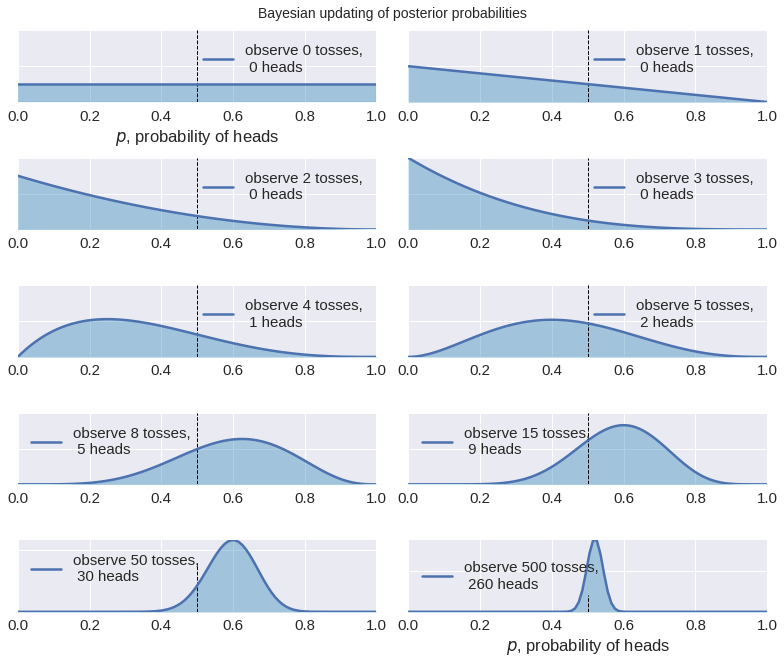

In [47]:
plt.figure(figsize=(11, 9))

# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials)/2, 2, k+1)
    plt.xlabel("$p$, probability of heads") if k in [0, len(n_trials)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    
    heads = data[:N].sum()
    #print("{} {}".format(1+heads, 1+N-heads))
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities", y=1.02, fontsize=14)
plt.tight_layout()

# Bug and Test

(0, 1)

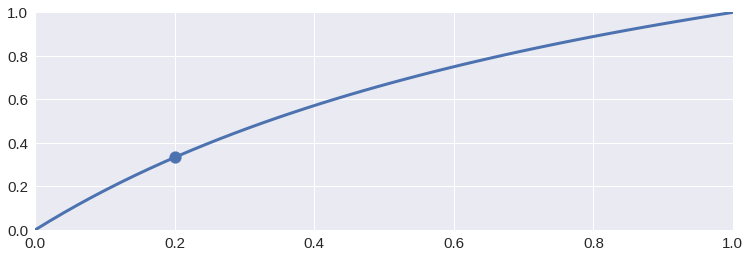

In [51]:
plt.figure(figsize=(12.5,4))
p = np.linspace(0, 1, 50)
plt.plot(p, 2*p/(1+p), lw=3)
plt.scatter(0.2, 2*0.2/1.2, s=140)
plt.xlim(0,1)
plt.ylim(0,1)

# Poisson (probability mass function)

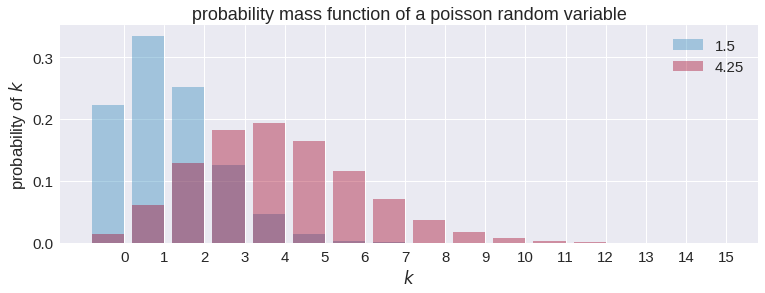

In [62]:
plt.figure(figsize=(12.5,4))
import scipy.stats as stats
a = np.arange(16)
poi = stats.poisson
lambda_ = [1.5, 4.25]
colours = ["#348ABD", "#A60628"]

plt.bar(a, poi.pmf(a, lambda_[0]), color=colours[0], alpha=0.4, lw='3', label=lambda_[0])
plt.bar(a, poi.pmf(a, lambda_[1]), color=colours[1], alpha=0.4, lw='3', label=lambda_[1])

plt.xticks(a+0.4, a)
plt.legend()
plt.ylabel("probability of $k$")
plt.xlabel('$k$')
plt.title('probability mass function of a poisson random variable')

# Exponential(probability dense function)

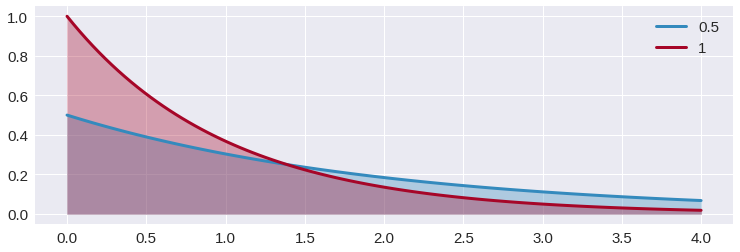

In [66]:
plt.figure(figsize=(12.5,4))
a = np.linspace(0, 4, 100)
expo = stats.expon
lambda_ = [0.5, 1]

for l, c in zip(lambda_, colours):
    plt.plot(a, expo.pdf(a, scale=1./l), lw=3, color=c, label=l)
    plt.fill_between(a, expo.pdf(a, scale=1./l), color=c, alpha=0.33)
    
plt.legend()

# Inferring behaviour from text-message data

(0, 74)

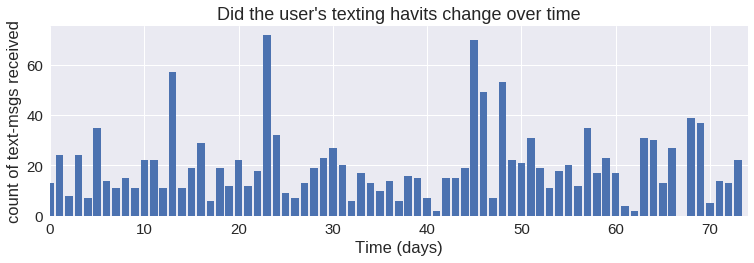

In [71]:
plt.figure(figsize=(12.5, 3.5))
count_data = np.loadtxt('data/txtdata.csv')
n_count_data = len(count_data)
plt.bar(np.arange(n_count_data), count_data)
plt.xlabel("Time (days)")
plt.ylabel("count of text-msgs received")
plt.title("Did the user's texting havits change over time")
plt.xlim(0, n_count_data)

# PyMC3

In [77]:
import pymc3 as pm
import theano.tensor as tt

with pm.Model() as model:
    alpha = 1.0 / count_data.mean()
    lambda_1 = pm.Exponential('lambda_1', alpha)
    lambda_2 = pm.Exponential('lambda_2', alpha)
    
    tau = pm.DiscreteUniform('tau', lower=0, upper=n_count_data-1)
    

In [78]:
with model:
    idx = np.arange(n_count_data)
    lambda_ = pm.math.switch(tau >= idx, lambda_1, lambda_2)

In [79]:
with model:
    observation = pm.Poisson('obs', lambda_, observed=count_data)

In [80]:
with model:
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000, step=step)

100%|██████████| 10000/10000 [00:03<00:00, 2965.40it/s]


In [81]:
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

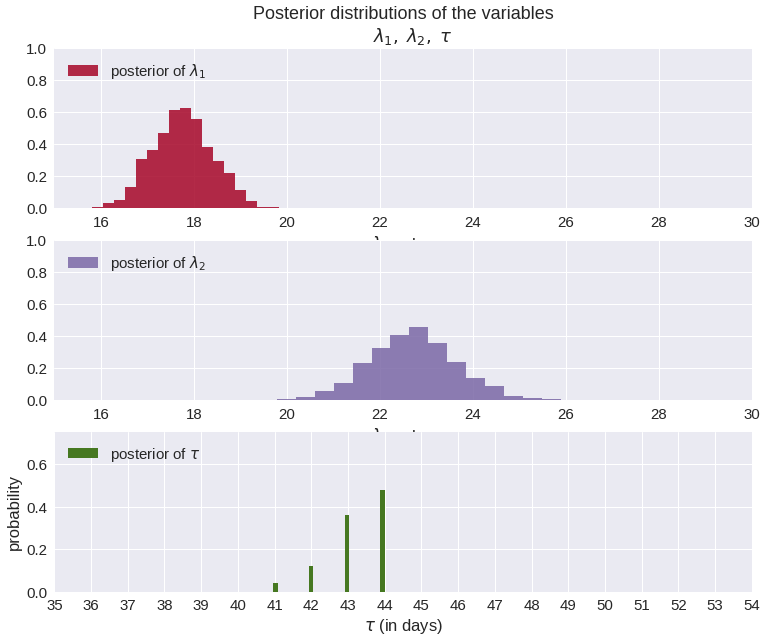

In [82]:
plt.figure(figsize=(12.5, 10))
ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", normed=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([15, 30])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", normed=True)
plt.legend(loc="upper left")
plt.xlim([15, 30])
plt.xlabel("$\lambda_2$ value")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))

plt.legend(loc="upper left")
plt.ylim([0, .75])
plt.xlim([35, len(count_data)-20])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("probability");

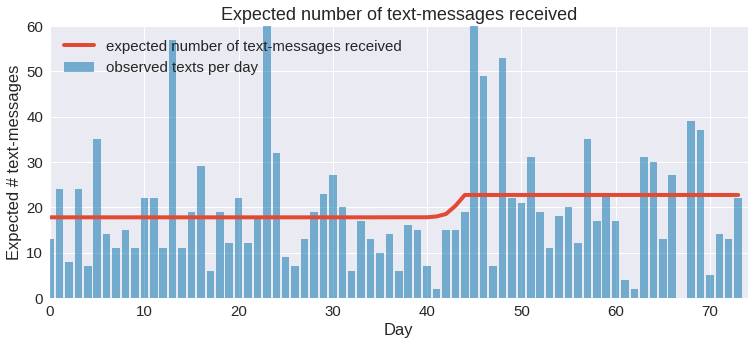

In [84]:
plt.figure(figsize=(12.5, 5))
# tau_samples, lambda_1_samples, lambda_2_samples contain
# N samples from the corresponding posterior distribution
N = tau_samples.shape[0]
expected_texts_per_day = np.zeros(n_count_data)
for day in range(0, n_count_data):
    # ix is a bool index of all tau samples corresponding to
    # the switchpoint occurring prior to value of 'day'
    ix = day < tau_samples
    # Each posterior sample corresponds to a value for tau.
    # for each day, that value of tau indicates whether we're "before"
    # (in the lambda1 "regime") or
    #  "after" (in the lambda2 "regime") the switchpoint.
    # by taking the posterior sample of lambda1/2 accordingly, we can average
    # over all samples to get an expected value for lambda on that day.
    # As explained, the "message count" random variable is Poisson distributed,
    # and therefore lambda (the poisson parameter) is the expected value of
    # "message count".
    expected_texts_per_day[day] = (lambda_1_samples[ix].sum()
                                   + lambda_2_samples[~ix].sum()) / N


plt.plot(range(n_count_data), expected_texts_per_day, lw=4, color="#E24A33",
         label="expected number of text-messages received")
plt.xlim(0, n_count_data)
plt.xlabel("Day")
plt.ylabel("Expected # text-messages")
plt.title("Expected number of text-messages received")
plt.ylim(0, 60)
plt.bar(np.arange(len(count_data)), count_data, color="#348ABD", alpha=0.65,
        label="observed texts per day")

plt.legend(loc="upper left");